In [4]:
#Falta ajustar el modelo y la curva
# 4
import numpy as np
import matplotlib.pyplot as plt

# tamaño de la red
L = 2

# temperatura
T = np.arange(0.5, 5 , 0.001)
B = 1/T


# esado inicial del sistema
spin = np.random.choice([-1, 1], size=(L, L))

In [9]:
# definimos una semilla
np.random.seed(2)

l0 = []
l1 = []
ep = []

# función que calcula los spines vecinos dependendiendo de cual spin se
def posiciones(spin):
    for i in range(np.shape(spin)[0]):
        for j in range(np.shape(spin)[1]):
            x, y = i, j
            if x == 0 and y == 0:
                s1 = spin[0, 1] + spin[1, 0]
            if x == 0 and y == 1:
                s2 = spin[0, 0] + spin[1, 1]
            if x == 1 and y == 0:
                s3 = spin[0, 0] + spin[1, 1]
            if x == 1 and y == 1:
                s4 = spin[1, 0] + spin[1, 0]
    return [s1, s2, s3, s4]

pho = posiciones(spin)

# iteramos sobre T 
for i in T:
        for j in pho:
            # calculamos la suma total de los spines
            h = np.sum(spin)
            # calculamos la probabilidad
            pr = 1 / ( 1 + np.exp(- (1/i) *  pho[j] * h ))
            #print(pr)

            # generamos el corte aleatorio
            c1 = np.random.uniform(0,1)

            # comparamos el corte con la probabilidad para ver si se cambia o no el spin y los guardamos en las listas vacías
            if pr < c1:
                s5 = spin[0, 0]
                l0.append(s5)

            else:
                s5 = - spin[0, 0]
                l1.append(s5)

            c2 = np.random.uniform(0,1)
            if pr < c2:
                s6 = spin[0, 1]
                l0.append(s6)
            else:
                s6 = -spin[0, 1]
                l1.append(s6)


            c3 = np.random.uniform(0,1)
            if pr < c3:
                s7 = spin[1, 0]
                l0.append(s7)
            else:
                s7 = -spin[1, 0]
                l1.append(s7)

            c4 = np.random.uniform(0,1)
            if pr < c4:
                s8 = spin[1, 1]
                l0.append(s8)
            else:
                s8 = -spin[1, 1]
                l1.append(s8)
            ln = [s5, s6, s7, s8]
            ln = np.array(ln)
        
        # calculamos la energía
        li = []
        for k in ln:
            for l in ln:
                h = k * l
                li.append(h)
                #h = np.sum(h)
                #print(h)

        # guardamos la energía
        ep.append(-1*sum(li))


# calcualmos el promedio de la energía y la energía promedio al cuadrado
ep = np.array(ep)
ep1 = np.cumsum(ep)


ep2 = ep**2
ep22 = np.cumsum(ep2)

e_promedio = []
e_promedio2 = []

for i in range(0,len(ep1)):
    e_promedio.append(ep1[i]/(i + 1))
    
for i in range(0,len(ep22)):
    e_promedio2.append(ep22[i]/(i + 1))

e_promedio = np.array(e_promedio)
e_promedio2 = np.array(e_promedio2)

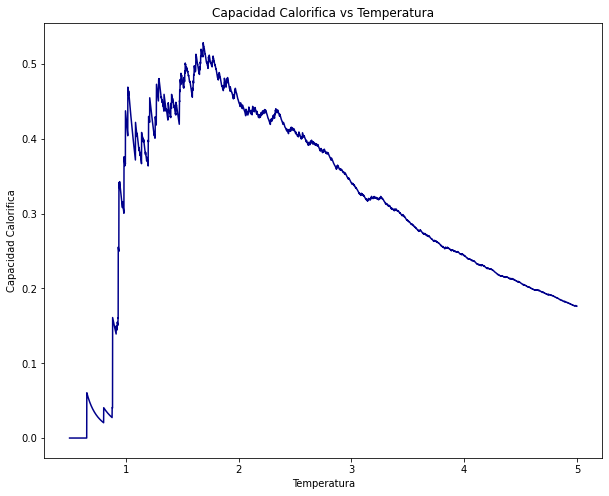

In [10]:
# graficamos 
plt.figure(figsize =(10, 8))
plt.title('Capacidad Calorifica vs Temperatura')
cv = (B**2 / 4) * (e_promedio2 - e_promedio**2)
plt.plot(T, cv, color = 'darkblue')
plt.xlabel('Temperatura')
plt.ylabel('Capacidad Calorifica')
plt.show()